# Importing Dataset and Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/Credit_Card_Applications.csv') # Dataset from UCI Machine Learning Repository
df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [4]:
df.describe()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
count,6.900000e+02,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,1.569047e+07,0.678261,31.568203,4.758725,1.766667,7.372464,4.692754,2.223406,0.523188,0.427536,2.40000,0.457971,1.928986,184.014493,1018.385507,0.444928
std,7.150647e+04,0.467482,11.853273,4.978163,0.430063,3.683265,1.992316,3.346513,0.499824,0.495080,4.86294,0.498592,0.298813,172.159274,5210.102598,0.497318
min,1.556571e+07,0.000000,13.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.563169e+07,0.000000,22.670000,1.000000,2.000000,4.000000,4.000000,0.165000,0.000000,0.000000,0.00000,0.000000,2.000000,80.000000,1.000000,0.000000
50%,1.569016e+07,1.000000,28.625000,2.750000,2.000000,8.000000,4.000000,1.000000,1.000000,0.000000,0.00000,0.000000,2.000000,160.000000,6.000000,0.000000
75%,1.575190e+07,1.000000,37.707500,7.207500,2.000000,10.000000,5.000000,2.625000,1.000000,1.000000,3.00000,1.000000,2.000000,272.000000,396.500000,1.000000
max,1.581544e+07,1.000000,80.250000,28.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,3.000000,2000.000000,100001.000000,1.000000


In [5]:
X = df.iloc[:, :-1].values
y= df.iloc[:, -1].values

In [6]:
X.shape

(690, 15)

In [7]:
y.shape

(690,)

In [8]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X_scaled = sc.fit_transform(X)

# Training the SOM

In [9]:
pip install minisom

In [10]:
from minisom import MiniSom # It's a Numpy based implementation of the Self Organizing Maps.
som = MiniSom(x = 10, y = 10, #  x and y are grid of the SOM.
              input_len = X.shape[1], #'input_len' is number of features.
              sigma = 1.0 ) # 'sigma' is radius of the different neighborhoods in the grid.

som.random_weights_init(X_scaled) # Randomly initialize the values of the weight vectores to close to 0.
som.train_random(data = X_scaled,
                  num_iteration=100)

In [11]:
som.distance_map()

array([[0.25272319, 0.31507584, 0.46752289, 0.51950866, 0.49225324,
        0.54975518, 0.39561163, 0.23441835, 0.28883807, 0.25547053],
       [0.3180641 , 0.56968505, 0.50775948, 0.63895135, 0.80339637,
        0.62029339, 0.55749439, 0.51619814, 0.58074307, 0.48160836],
       [0.36201898, 0.42314457, 0.53571666, 0.64953852, 0.65498357,
        0.81989566, 0.57528204, 0.6250289 , 0.82204184, 0.48890787],
       [0.33902028, 0.61177203, 0.44948678, 0.71685824, 1.        ,
        0.71907938, 0.75648659, 0.78690512, 0.82677472, 0.47238193],
       [0.46213066, 0.59784923, 0.61275721, 0.76697022, 0.79545209,
        0.80086441, 0.7618694 , 0.92015107, 0.8477321 , 0.53799199],
       [0.49109163, 0.73241393, 0.6285018 , 0.75351142, 0.69803213,
        0.65007592, 0.77825161, 0.75114529, 0.77645724, 0.47453901],
       [0.38910477, 0.68606697, 0.65401923, 0.72487366, 0.59029438,
        0.60503141, 0.71863158, 0.64493485, 0.80299489, 0.5138398 ],
       [0.38133066, 0.55081121, 0.6731346

In [12]:
som.distance_map().shape

(10, 10)

# Visualizing the Results

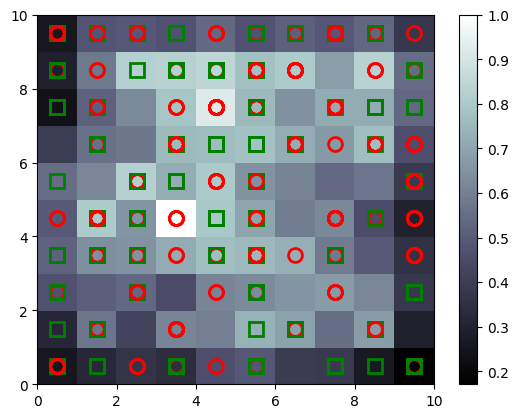

In [13]:
from pylab import bone, pcolor, colorbar, plot, show
bone() # Initializing the window.
pcolor(som.distance_map().T) # Transpose of the distance map.
colorbar() # Legend

#To see did customer get approval or denial using markers and colors.
markers = ['o','s'] # 'o' represents Circle, 's' represents square.
colors = ['r', 'g'] # 'r' represents red, 'g' represents green.
for i,x in enumerate(X_scaled): # i is indexes, x is rows.
  w= som.winner(x) # Getting the winner node.
  plot(w[0] +0.5,
       w[1] +0.5, # Putting the marker at the center of the square.
       markers[y[i]], # y[i] 0 if customer didn't get approval, 1 if got approval
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [14]:
mappings = som.win_map(X_scaled)
frauds = np.concatenate((mappings[(5, 1)], mappings[(4,8)]), axis=0)
frauds = sc.inverse_transform(frauds)
frauds = pd.DataFrame(frauds)
pd.set_option('display.max_rows', 50)
frauds.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,15799785.0,1.0,56.42,28.000,1.0,8.0,4.0,28.500,1.0,1.0,40.0,0.0,2.0,0.0,16.0
1,15775750.0,1.0,28.25,5.040,1.0,8.0,5.0,1.500,1.0,1.0,8.0,1.0,2.0,144.0,8.0
2,15775235.0,1.0,43.08,0.375,1.0,8.0,4.0,0.375,1.0,1.0,8.0,1.0,2.0,300.0,163.0
3,15768474.0,1.0,21.92,0.540,1.0,14.0,4.0,0.040,1.0,1.0,1.0,1.0,2.0,840.0,60.0
4,15762045.0,1.0,21.00,4.790,1.0,9.0,4.0,2.250,1.0,1.0,1.0,1.0,2.0,80.0,301.0
5,15799859.0,1.0,23.58,0.460,1.0,9.0,4.0,2.625,1.0,1.0,6.0,1.0,2.0,208.0,348.0
6,15789014.0,1.0,27.58,2.040,1.0,6.0,4.0,2.000,1.0,1.0,3.0,1.0,2.0,370.0,561.0
7,15652048.0,1.0,13.75,4.000,1.0,9.0,4.0,1.750,1.0,1.0,2.0,1.0,2.0,120.0,1001.0
